# Heatmaps

Heatmaps are a way to visualize three-dimensions of data and to take advantage of spatial proximity of those dimensions.
It should be used to find patterns on continuous data it is not meant for categorical data

In [1]:
# Let's bring in matplotlib and numpy, as well as pandas and some date time functionality
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# In this example I want to show you some traffic data from New York City, which is
# all available from NYC open data portal.
df=pd.read_csv("NYC hourly traffic.csv")

# I'm going to convert the date column into a date and time
df["Date"]=df["Date"].apply(pd.to_datetime)

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


In [12]:
sample_to_work_on = df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-05-01'")
sample_to_work_on.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16


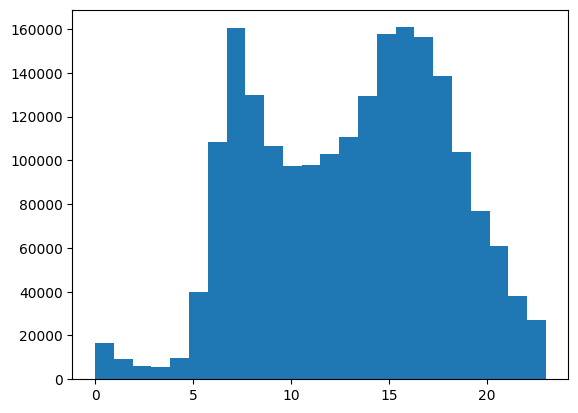

In [16]:
plt.hist(sample_to_work_on['Hour'],bins=24,weights=sample_to_work_on['# Vehicles - E-ZPass'])
plt.show()
#also it is important to indicate the hourly data is ordered in hours this is why we can see this clear

### As we can see the 5-10am and 15-17 hours are bigger in weight which helps us conclude these are rush hours for traffic

#### I also want to find which days are more crowded to do this i have to retrieve day of the data

C:\Users\eren\AppData\Local\Temp\ipykernel_14924\3278770895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_to_work_on['Day of Week'] = sample_to_work_on['Date'].dt.day_of_week


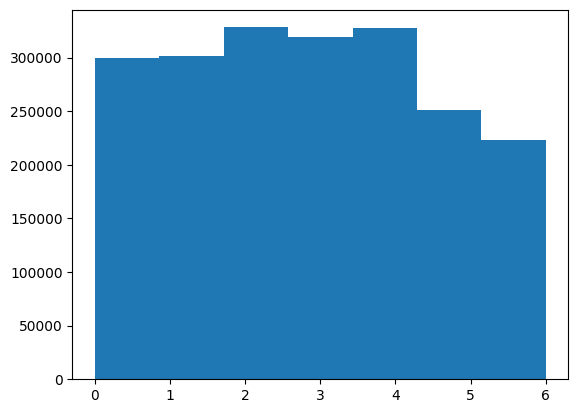

In [26]:
sample_to_work_on['Day of Week'] = sample_to_work_on['Date'].dt.day_of_week

plt.hist(sample_to_work_on['Day of Week'],bins=7,weights=sample_to_work_on['# Vehicles - E-ZPass'])
plt.show()

### The weekedns ofcourse has less traffic compared to weekdays
#### Lets combine this tho conclusions about hour and weekdays in heatmap can be reffered as 2dhistogram also


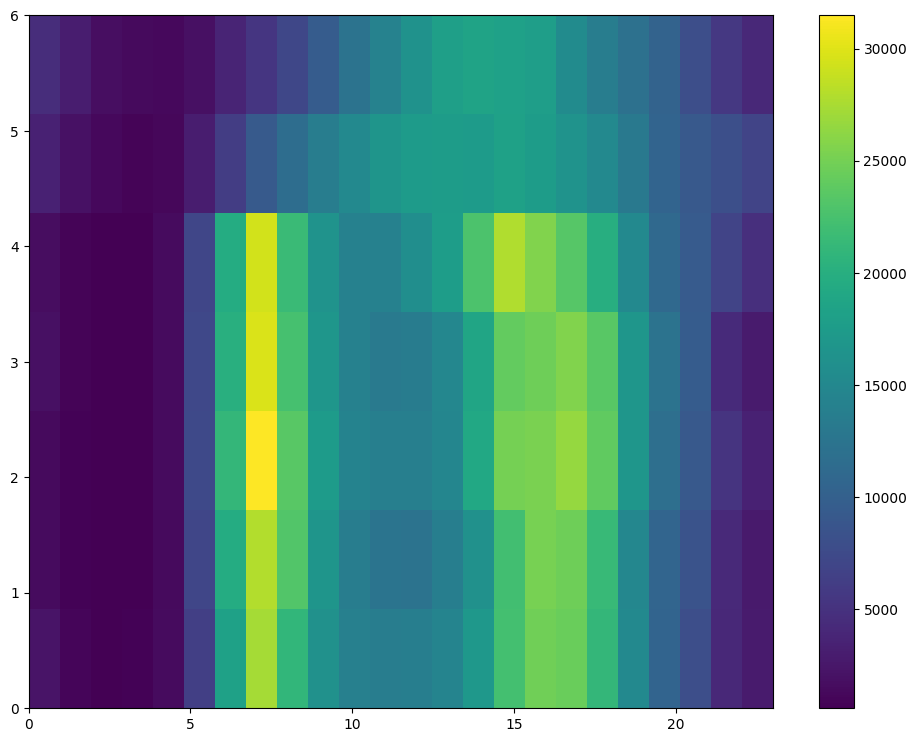

In [34]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax = plt.hist2d(
    sample_to_work_on['Hour'],
    sample_to_work_on['Day of Week'],
    bins=[24,7],
    weights=sample_to_work_on['# Vehicles - E-ZPass'],
)
plt.colorbar()
plt.show()



Great! So lets disect this. First, we see that across all days (our y axis) the first four or so hours of the day are dark blue (this is the first four columns or so), indicating relatively little traffic. Then we see that for the days 0 through 4 we get a spike in traffic, shown as more yellow intensity cells in the image, but this isn't really true for the last two days of the week (the weekend - the top two rows).

Time data is an interesting case for using heat maps, because we often have cycles of activity within a time period -- in this case weeks -- and that allows us to have two ordered dimensions.

Now would be a good time for you to grab control and see if you could look at a different dimension -- months. Could you plot a heat map where one axis is months and the other is, say, week of the month?